In [12]:
#####JAN - MAY 2017: LINKS
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

###load all the datasets
##meta_data file

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
all_df = pd.read_csv('/Users/eshwarchandrasekharan/Downloads/jan_may_2017_links')
all_df = all_df.fillna(0)
all_df.columns

Index(['buzz_external_id', 'buzz_post_parent_external_id',
       'buzz_post_created_at', 'buzz_account_display_name',
       'buzz_post_type_name', 'buzz_post_buzz_id', 'buzz_campaign_uri',
       'buzz_campaign_name', 'ext_table1_stats_date', 'ext_external_id',
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan', 'ext_table1_firsthour_stats_date',
       'ext_twodays_consumptions_by_type__link_clicks',
       'ext_twodays_stories_by_action_type__share', 'ext_twodays_stats_date'],
      dtype='object')

Without cross-promotion features
Testing for shares!
(29784, 10) (29784,)
(7447, 10) (7447,)


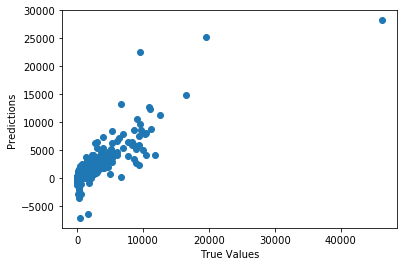

Predict  share
Trial run - Score: 0.788398653783


/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Cross-validated scores: [ 0.77239694  0.81743226  0.81118261  0.82001008  0.86901937  0.78413873
  0.78497755  0.26114826  0.41077002  0.69332535]
Mean accuracy =  0.702440118775
Cross-Predicted Accuracy (R2): 0.695993394052
Mean Absolute Error:  132.31779224
Mean values:  287.1133732642153  | percent error:  0.460855552409
Testing for clicks!
(29784, 10) (29784,)
(7447, 10) (7447,)


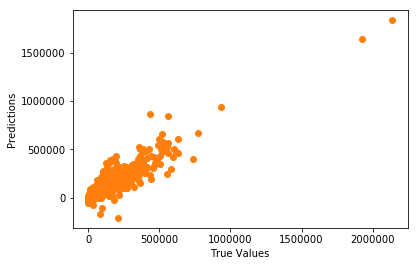

Predict  clicks
Trial run - Score: 0.89306069122
Cross-validated scores: [ 0.86305353  0.92634969  0.89752295  0.90288274  0.9266008   0.90830854
  0.89687477  0.56313511  0.77972643  0.88390642]
Mean accuracy =  0.8548360965
Cross-Predicted Accuracy (R2): 0.860815935972
Mean Absolute Error:  8191.93126326
Mean values:  26589.06833015498  | percent error:  0.308093956567
                                               0          0
0   ext_table1_consumptions_by_type__link_clicks   2.639346
1  ext_table1_consumptions_by_type__other_clicks  -0.092743
2                ext_table1_reactions_like_total   9.334778
3     ext_table1_stories_by_action_type__comment   6.441142
4        ext_table1_stories_by_action_type__like  -5.882835
5       ext_table1_stories_by_action_type__share  45.733976
6                         ext_table1_engaged_fan   1.334281
7                           ext_table1_fan_reach   0.723942
8                         ext_table1_impressions  -0.284538
9                     ext_

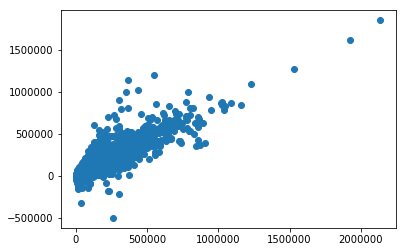

In [5]:
###PREDICTION: Cross-validation
train = all_df
##drop dups
train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("Without cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
               ]
# alt_inf = len(all_pages) + 1
# train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
# for pg in all_pages:
#     features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

y_clicks = train['ext_twodays_consumptions_by_type__link_clicks']
y_share = train['ext_twodays_stories_by_action_type__share']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())

###get coefficients
import numpy as np
print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

In [6]:
#####REGRESSION: without cross-promotion

train = all_df
##drop dups
train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
               ]

####add the category variable for each of the pages in col_pages
# for pg in all_pages:
#     features.append(pg)

###overall clicks
res = ols(y = train['ext_twodays_consumptions_by_type__link_clicks'], x = train[features])
print(res)

print('Share performance')

###24-hour share
#     res = ols(y = train['24_hours_share'], x = train[features])
#     print(res)

###overall share
res = ols(y = train['ext_twodays_stories_by_action_type__share'], x = train[features])
print(res)

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <ext_table1_consumptions_by_type__link_clicks>
             + <ext_table1_consumptions_by_type__other_clicks> + <ext_table1_reactions_like_total>
             + <ext_table1_stories_by_action_type__comment>
             + <ext_table1_stories_by_action_type__like> + <ext_table1_stories_by_action_type__share>
             + <ext_table1_engaged_fan> + <ext_table1_fan_reach>
             + <ext_table1_impressions> + <ext_table1_impressions_fan> + <intercept>

Number of Observations:         37231
Number of Degrees of Freedom:   11

R-squared:         0.8776
Adj R-squared:     0.8776

Rmse:          23525.1397

F-stat (10, 37220): 26690.5987, p-value:     0.0000

Degrees of Freedom: model 10, resid 37220

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
---------------------------------

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
###drop duplicate (buzz_id, external_id) pairs
# train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

In [8]:
####CROSS-PROMOTION FEATURES INCLUDED

In [9]:
df = all_df.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

all_pages = list(df.buzz_account_display_name.unique())
print("Total pages considered: ", len(all_pages))

def get_cross_posted_pages(x):
        tf = df[df.buzz_post_buzz_id == x].sort_values('buzz_post_created_at', ascending = 1)
        return tf.buzz_account_display_name.unique()

df['cross_promotion_pages'] = df['buzz_post_buzz_id'].apply(get_cross_posted_pages)

def generate_cat_pages(x, y):
        if(y in x):
            return list(x).index(y) + 1
        else:
            return math.inf

###categorical features for pages where the link was shared
for pag in all_pages:
#     print("Getting for ", pag)
    df[pag] = df['cross_promotion_pages'].apply(generate_cat_pages, y = pag)

df.to_csv('jan_may_2017_links_cross_posting_info.csv', index = False)

Total pages considered:  88


WITH cross-promotion features
Testing for shares!
(29784, 98) (29784,)
(7447, 98) (7447,)


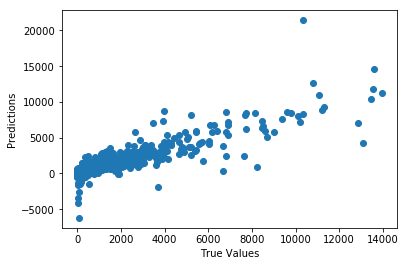

Predict  share
Trial run - Score: 0.815373889684
Cross-validated scores: [ 0.77255442  0.81754588  0.81296912  0.81793601  0.86739322  0.78776374
  0.78920426  0.2803862   0.42085858  0.69752532]
Mean accuracy =  0.706413675914
Cross-Predicted Accuracy (R2): 0.700232621178
Mean Absolute Error:  140.04687257
Mean values:  287.1133732642153  | percent error:  0.487775511734
Testing for clicks!
(29784, 98) (29784,)
(7447, 98) (7447,)


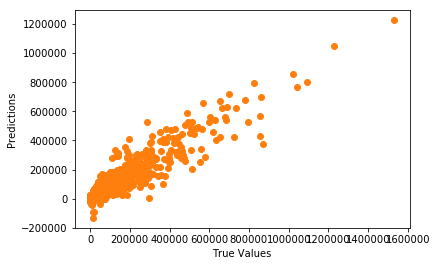

Predict  clicks
Trial run - Score: 0.895936482167
Cross-validated scores: [ 0.86673133  0.9270701   0.89800218  0.90515488  0.92865339  0.91113331
  0.89817431  0.58268658  0.78795223  0.8858342 ]
Mean accuracy =  0.859139251861
Cross-Predicted Accuracy (R2): 0.864796005025
Mean Absolute Error:  8389.1062417
Mean values:  26589.06833015498  | percent error:  0.31550959731
                                                0           0
0    ext_table1_consumptions_by_type__link_clicks    1.613988
1   ext_table1_consumptions_by_type__other_clicks   -0.888014
2                 ext_table1_reactions_like_total    8.827714
3      ext_table1_stories_by_action_type__comment    6.984470
4         ext_table1_stories_by_action_type__like   -5.794903
5        ext_table1_stories_by_action_type__share   42.119500
6                          ext_table1_engaged_fan    2.265222
7                            ext_table1_fan_reach    0.728248
8                          ext_table1_impressions   -0.209696
9    

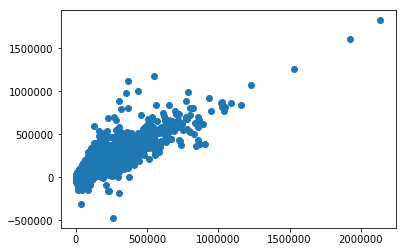

In [10]:
###PREDICTION TASK - with cross-promotion
###Cross-validation
train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
##drop dups
# train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
               ]

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

y_clicks = train['ext_twodays_consumptions_by_type__link_clicks']
y_share = train['ext_twodays_stories_by_action_type__share']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())
###get coefficients
import numpy as np
print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

In [93]:
#####REGRESSION: WITH cross-promotion
train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
##drop dups
# train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
               ]
8
alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###overall clicks
res = ols(y = train['ext_twodays_consumptions_by_type__link_clicks'], x = train[features])
print(res)

print('Share performance')

###24-hour share
#     res = ols(y = train['24_hours_share'], x = train[features])
#     print(res)

###overall share
res = ols(y = train['ext_twodays_stories_by_action_type__share'], x = train[features])
print(res)

WITH cross-promotion features


/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://www.statsmodels.org/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <ext_table1_consumptions_by_type__link_clicks>
             + <ext_table1_consumptions_by_type__other_clicks> + <ext_table1_reactions_like_total>
             + <ext_table1_stories_by_action_type__comment>
             + <ext_table1_stories_by_action_type__like> + <ext_table1_stories_by_action_type__share>
             + <ext_table1_engaged_fan> + <ext_table1_fan_reach>
             + <ext_table1_impressions> + <ext_table1_impressions_fan> + <BuzzFeed Quiz>
             + <BuzzFeed Japan> + <BuzzFeed UK> + <BuzzFeed Brasil> + <BuzzFeed Japan News>
             + <BuzzFeed Deutschland> + <BuzzFeed News> + <BuzzFeed>
             + <BuzzFeed Canada> + <BuzzFeed Video> + <Cocoa Butter>
             + <BuzzFeed Oz Politics> + <Quizzes En Español> + <Obsessed by BuzzFeed>
             + <BuzzFeed News BR> + <Buy Me That> + <BuzzFeed UK Politics> + <BuzzFeed Australia>
             + <BuzzFeed Rew

In [99]:
y.mean()

26589.06833015498

In [125]:
for sample in all_df['buzz_post_buzz_id'][5:6]:
    t = all_df[all_df.buzz_post_buzz_id == sample]

In [134]:
t.sort_values('buzz_post_created_at')[:10]

,buzz_external_id,buzz_post_parent_external_id,buzz_post_created_at,buzz_account_display_name,buzz_post_type_name,buzz_post_buzz_id,buzz_campaign_uri,buzz_campaign_name,ext_table1_stats_date,ext_external_id,...,ext_table1_stories_by_action_type__like,ext_table1_stories_by_action_type__share,ext_table1_engaged_fan,ext_table1_fan_reach,ext_table1_impressions,ext_table1_impressions_fan,ext_table1_firsthour_stats_date,ext_twodays_consumptions_by_type__link_clicks,ext_twodays_stories_by_action_type__share,ext_twodays_stats_date
12,254018121357088_1280495785375978,0.0,2017-02-18 03:18:26.856946,BuzzFeed Style,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 03:20:04 UTC,254018121357088_1280495785375978,...,297.0,21.0,7753,74370,102726,99577,2017-02-18 04:20:05 UTC,73245.0,115.0,2017-02-20 04:01:28 UTC
18226,254018121357088_1280495785375978,0.0,2017-02-18 03:18:26.856946,BuzzFeed Style,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 03:20:04 UTC,254018121357088_1280495785375978,...,297.0,21.0,7753,74370,102726,99577,2017-02-18 04:20:05 UTC,73281.0,115.0,2017-02-20 04:15:07 UTC
4,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:08 UTC,5434.0,14.0,2017-02-20 05:30:18 UTC
5,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:06 UTC,5434.0,14.0,2017-02-20 05:30:18 UTC
9360,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:08 UTC,5431.0,14.0,2017-02-20 05:15:10 UTC
9361,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:06 UTC,5431.0,14.0,2017-02-20 05:15:10 UTC
45414,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:08 UTC,5429.0,14.0,2017-02-20 05:01:32 UTC
45415,280467515620435_418827981784387,0.0,2017-02-18 05:27:11.699785,Obsessed by BuzzFeed,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-18 04:45:07 UTC,280467515620435_418827981784387,...,12.0,5.0,564,5735,7950,7771,2017-02-18 05:45:06 UTC,5429.0,14.0,2017-02-20 05:01:32 UTC
14215,257431141042836_1197466950372579,0.0,2017-02-19 00:29:11.218463,BuzzFeed Rewind,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-19 00:30:06 UTC,257431141042836_1197466950372579,...,64.0,8.0,2573,31586,40832,39826,2017-02-19 01:30:05 UTC,23343.0,57.0,2017-02-21 01:02:52 UTC
23013,257431141042836_1197466950372579,0.0,2017-02-19 00:29:11.218463,BuzzFeed Rewind,link,4467070,the-front-row-of-nyfw-now-vs-10-years-ago,The Front Row Of NYFW Now Vs. 10 Years Ago,2017-02-19 00:30:06 UTC,257431141042836_1197466950372579,...,64.0,8.0,2573,31586,40832,39826,2017-02-19 01:30:05 UTC,23344.0,57.0,2017-02-21 01:15:07 UTC


In [119]:
train[all_df.buzz_post_buzz_id == sample].sort_values('ext_table1_firsthour_stats_date')['ext_table1_consumptions_by_type__link_clicks']

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


18226     7976.0
9361       628.0
14215     2746.0
21213    47957.0
10482     1663.0
Name: ext_table1_consumptions_by_type__link_clicks, dtype: float64

In [120]:
train[all_df.buzz_post_buzz_id == sample].sort_values('ext_table1_firsthour_stats_date')['ext_twodays_stories_by_action_type__share']

/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


18226    115.0
9361      14.0
14215     57.0
21213    157.0
10482     21.0
Name: ext_twodays_stories_by_action_type__share, dtype: float64

In [122]:
sample

4467070

WITH cross-promotion features
Testing for shares!
(29784, 98) (29784,)
(7447, 98) (7447,)


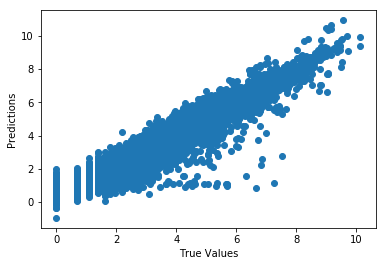

Predict  share
Trial run - Score: 0.905701590436
Cross-validated scores: [ 0.92059344  0.91951683  0.91061283  0.92046387  0.90276891  0.84674781
  0.87447005  0.86826673  0.90148528  0.90815865]
Mean accuracy =  0.897308439345
Cross-Predicted Accuracy (R2): 0.455529315632
Mean Absolute Error:  120.432294303
Mean values:  287.1133732642153  | percent error:  0.419459020434
Testing for clicks!
(29784, 98) (29784,)
(7447, 98) (7447,)


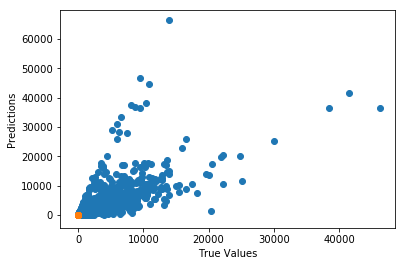

Predict  clicks
Trial run - Score: 0.922566707479
Cross-validated scores: [ 0.94215752  0.94075829  0.90645149  0.93957797  0.87895369  0.82804802
  0.84025257  0.85839203  0.93221855  0.92886683]
Mean accuracy =  0.899567695025
Cross-Predicted Accuracy (R2): 0.718131923118
Mean Absolute Error:  8189.26699727
Mean values:  26589.06833015498  | percent error:  0.307993755012
                                                0         0
0    ext_table1_consumptions_by_type__link_clicks  1.024547
1   ext_table1_consumptions_by_type__other_clicks -0.004434
2                 ext_table1_reactions_like_total -0.039196
3      ext_table1_stories_by_action_type__comment -0.028830
4         ext_table1_stories_by_action_type__like  0.029213
5        ext_table1_stories_by_action_type__share  0.028864
6                          ext_table1_engaged_fan -0.053783
7                            ext_table1_fan_reach  1.173401
8                          ext_table1_impressions -0.417097
9                      

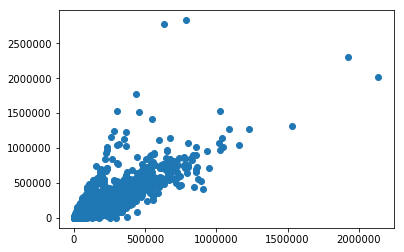

In [11]:
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

############ LOG SCALING - 
###PREDICTION TASK - with cross-promotion
###Cross-validation
train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
##drop dups
# train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
        ]

###convert to log-scale
for feat in features:
    train[feat] = np.log(train[feat]+1)

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

y_clicks = np.log(train['ext_twodays_consumptions_by_type__link_clicks'] + 1)
y_share = np.log(train['ext_twodays_stories_by_action_type__share'] + 1)

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)

###CONVERT FROM LOG TO EXPONENTS - 
y = np.exp(y) - 1
predictions = np.exp(predictions) - 1


plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)

###CONVERT FROM LOG TO EXPONENTS - 
y = np.exp(y) - 1
predictions = np.exp(predictions) - 1
######


plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())
###get coefficients
import numpy as np
print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

WITH cross-promotion features
Testing for shares!
(29784, 98) (29784,)
(7447, 98) (7447,)


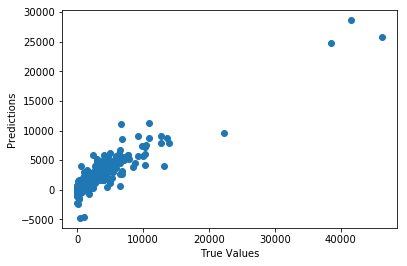

Predict  share
Trial run - Score: 0.82406433162
Cross-validated scores: [ 0.77255442  0.81754588  0.81296912  0.81793601  0.86739322  0.78776374
  0.78920426  0.2803862   0.42085858  0.69752532]
Mean accuracy =  0.706413675914
Cross-Predicted Accuracy (R2): 0.700232621178
Mean Absolute Error:  140.04687257
Mean values:  287.1133732642153  | percent error:  0.487775511734
Testing for clicks!
(29784, 98) (29784,)
(7447, 98) (7447,)


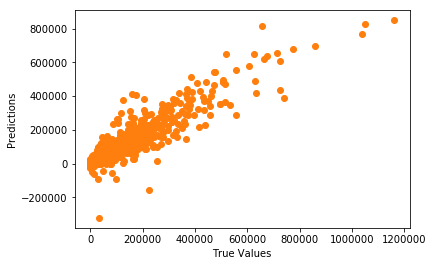

Predict  clicks
Trial run - Score: 0.890614618573
Cross-validated scores: [ 0.86673133  0.9270701   0.89800218  0.90515488  0.92865339  0.91113331
  0.89817431  0.58268658  0.78795223  0.8858342 ]
Mean accuracy =  0.859139251861
Cross-Predicted Accuracy (R2): 0.864796005025
Mean Absolute Error:  8389.1062417
Mean values:  26589.06833015498  | percent error:  0.31550959731
                                                0             0
0    ext_table1_consumptions_by_type__link_clicks  1.961299e+00
1   ext_table1_consumptions_by_type__other_clicks -5.642477e-01
2                 ext_table1_reactions_like_total  8.173784e+00
3      ext_table1_stories_by_action_type__comment  7.885644e+00
4         ext_table1_stories_by_action_type__like -5.733580e+00
5        ext_table1_stories_by_action_type__share  5.037132e+01
6                          ext_table1_engaged_fan  2.028165e+00
7                            ext_table1_fan_reach  7.363134e-01
8                          ext_table1_impressions

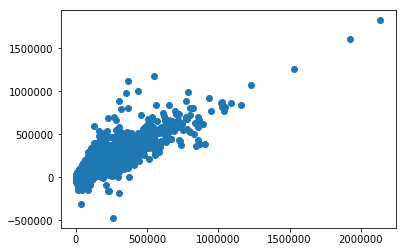

In [14]:
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

############ LOG SCALING - 
###PREDICTION TASK - with cross-promotion
###Cross-validation
train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
##drop dups
# train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
        ]

###convert to log-scale
# for feat in features:
#     train[feat] = np.log(train[feat]+1)

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

y_clicks = (train['ext_twodays_consumptions_by_type__link_clicks'])
y_share = (train['ext_twodays_stories_by_action_type__share'])

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)


plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)


plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())
###get coefficients
import numpy as np
print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

WITH cross-promotion features
Testing for shares!
Cross-validated scores: [ 0.77255442  0.81754588  0.81296912  0.81793601  0.86739322  0.78776374
  0.78920426  0.2803862   0.42085858  0.69752532]
Mean accuracy =  0.706413675914
Cross-Predicted Accuracy (R2): 0.700232621178
Mean Absolute Error:  140.04687257
Mean values:  287.1133732642153  | percent error:  0.487775511734
Testing for clicks!
Cross-validated scores: [ 0.86673133  0.9270701   0.89800218  0.90515488  0.92865339  0.91113331
  0.89817431  0.58268658  0.78795223  0.8858342 ]
Mean accuracy =  0.859139251861
Cross-Predicted Accuracy (R2): 0.864796005025
Mean Absolute Error:  8389.1062417
Mean values:  26589.06833015498  | percent error:  0.31550959731
                                                0             0
0    ext_table1_consumptions_by_type__link_clicks  1.961299e+00
1   ext_table1_consumptions_by_type__other_clicks -5.642477e-01
2                 ext_table1_reactions_like_total  8.173784e+00
3      ext_table1_stori

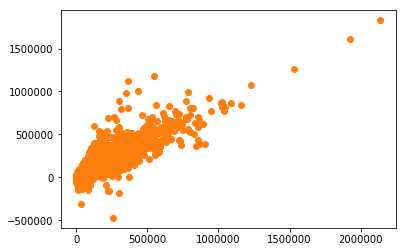

In [33]:
###ALT
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

############ LOG SCALING - 
###PREDICTION TASK - with cross-promotion
###Cross-validation
train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
##drop dups
# train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
        ]

###convert to log-scale
# for feat in features:
#     train[feat] = np.log(train[feat]+1)

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

train['clicks_bucket'] = np.log(train['ext_twodays_consumptions_by_type__link_clicks'] + 1).astype(int)
train['share_bucket'] = np.log(train['ext_twodays_stories_by_action_type__share']+1).astype(int)


y_clicks = train['ext_twodays_consumptions_by_type__link_clicks']
y_share = train['ext_twodays_stories_by_action_type__share']
# y_clicks = train['clicks_bucket']
# y_share = train['share_bucket']

###generate DFs for analysis - X and Y
df = train[features]

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

# fit a model
model = linear_model.LinearRegression()

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)

plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

model = linear_model.LinearRegression()

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)


plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
print("Mean values: ", y.mean(), " | percent error: ",  mean_absolute_error(y, predictions)/y.mean())
###get coefficients
import numpy as np
print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

print("No. of data-points = ", len(y))

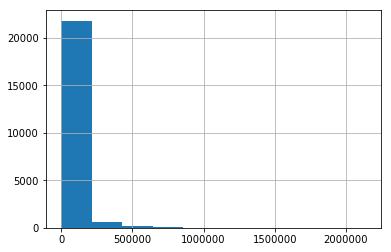

In [28]:
y.hist()

In [ ]:
####buckets - classification

In [12]:
train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')

In [18]:
# ext_twodays_consumptions_by_type__link_clicks
# ext_twodays_stories_by_action_type__share
train['ext_twodays_consumptions_by_type__link_clicks'].mean(), train['ext_twodays_consumptions_by_type__link_clicks'].min(), train['ext_twodays_consumptions_by_type__link_clicks'].max()

(26589.06833015498, 0.0, 2138396.0)

In [20]:
100*train['ext_twodays_consumptions_by_type__link_clicks'].mean()/train['ext_twodays_consumptions_by_type__link_clicks'].max()

1.2434118063331103

In [27]:
train['clicks_bucket'] = np.log(train['ext_twodays_consumptions_by_type__link_clicks']+1).astype(int)
train['share_bucket'] = np.log(train['ext_twodays_stories_by_action_type__share']+1).astype(int)

In [13]:
#####CLASSIFICATION
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')

# subsample = 1
subsample = 0

if subsample == 1:
    train = train[:1000]

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
        ]

###convert to log-scale
for feat in features:
    train[feat] = np.log(train[feat]+1)

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

X = df

train['clicks_bucket'] = np.log(train['ext_twodays_consumptions_by_type__link_clicks']+1).astype(int)
train['share_bucket'] = np.log(train['ext_twodays_stories_by_action_type__share']+1).astype(int)

y_clicks = train['clicks_bucket']
y_share = train['share_bucket']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

cv = 2
nb_alpha = 0.01
# classifier = 'svm'
# classifier = 'nb'
classifier = 'logit'
# classifier ='rf'
logit_c = 1e5

####classifier
# clf = LinearSVC(C=1)
if classifier == 'nb':
    clf = MultinomialNB(alpha = nb_alpha)
if classifier == 'logit':
    clf = linear_model.LogisticRegression(C=logit_c)
#   Try penalty='l2' and 'l1'
if classifier == 'rf':
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
else:
    clf = svm.SVC(kernel='linear')
    ###try different kernels

predicted = cross_val_predict(clf, X, y, cv=cv)
scores = metrics.accuracy_score(y, predicted)
# scores = cross_val_score(clf, X, y, cv = 10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Accuracy: ", scores)

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

####classifier
# clf = LinearSVC(C=1)
if classifier == 'nb':
    clf = MultinomialNB(alpha = nb_alpha)
if classifier == 'logit':
    clf = linear_model.LogisticRegression(C=logit_c)
#   Try penalty='l2' and 'l1'
if classifier == 'rf':
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
else:
    clf = svm.SVC(kernel='linear')
    ###try different kernels

predicted = cross_val_predict(clf, X, y, cv=cv)
scores = metrics.accuracy_score(y, predicted)
# scores = cross_val_score(clf, X, y, cv = 10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Accuracy: ", scores)

WITH cross-promotion features
Testing for shares!
Accuracy:  0.618973436115
Testing for clicks!
Accuracy:  0.671590878569


In [ ]:
# scores = cross_val_score(clf, X, y, cv = 10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [65]:
l = pd.DataFrame(y)
l['prediction'] = predicted

In [66]:
l[l['clicks_bucket'] == 10]

,clicks_bucket,prediction
7,10,11
18,10,11
39,10,11
57,10,8
59,10,9
61,10,9
64,10,12
70,10,12
81,10,8
86,10,8


In [69]:
l.max()

clicks_bucket    14
prediction       14
dtype: int64

In [19]:
print(1)

1


In [14]:
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
##### LOW, MEDIUM, HIGH classification - 

#####
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
import math

train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
all_pages = list(train.buzz_account_display_name.unique())

# subsample = 1
subsample = 0

if subsample == 1:
    train = train[:1000]

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
        ]

###convert to log-scale
for feat in features:
    train[feat] = np.log(train[feat]+1)

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

X = df


####low, med, high classes;
low = 100
high = 10000

def get_class(x):
    if x < low:
        return 0
    elif x < high:
        return 1
    else:
        return 2

train['clicks_bucket'] = train['ext_twodays_consumptions_by_type__link_clicks'].apply(get_class)
train['share_bucket'] = train['ext_twodays_stories_by_action_type__share'].apply(get_class)

y_clicks = train['clicks_bucket']
y_share = train['share_bucket']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

cv = 5
nb_alpha = 0.01
# classifier = 'svm'
classifier = 'nb'
# classifier = 'logit'
# classifier ='rf'
logit_c = 1e5

####classifier
# clf = LinearSVC(C=1)
if classifier == 'nb':
    clf = MultinomialNB(alpha = nb_alpha)
if classifier == 'logit':
    clf = linear_model.LogisticRegression(C=logit_c)
#   Try penalty='l2' and 'l1'
if classifier == 'rf':
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
else:
    clf = svm.SVC(kernel='linear')
    ###try different kernels

# predicted = cross_val_predict(clf, X, y, cv=cv)
# scores = metrics.accuracy_score(y, predicted)
scores = cross_val_score(clf, X, y, cv = cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# print("Accuracy: ", scores)

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

####classifier
# clf = LinearSVC(C=1)
if classifier == 'nb':
    clf = MultinomialNB(alpha = nb_alpha)
if classifier == 'logit':
    clf = linear_model.LogisticRegression(C=logit_c)
#   Try penalty='l2' and 'l1'
if classifier == 'rf':
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
else:
    clf = svm.SVC(kernel='linear')
    ###try different kernels

# predicted = cross_val_predict(clf, X, y, cv=cv)
# scores = metrics.accuracy_score(y, predicted)
scores = cross_val_score(clf, X, y, cv = cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# print("Accuracy: ", scores)

WITH cross-promotion features
Testing for shares!
Accuracy:  0.932985952566
Testing for clicks!
Accuracy:  0.908060487228


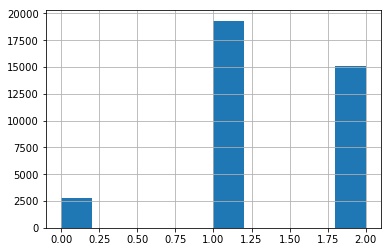

In [19]:
%matplotlib inline 
train['clicks_bucket'].hist()

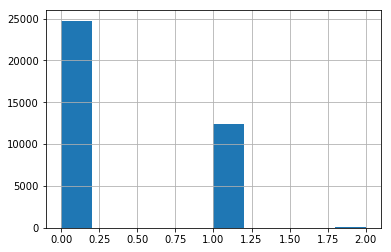

In [21]:
train['share_bucket'].hist()

In [4]:
#####CLASSIFICATION
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
import math

train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
all_pages = list(train.buzz_account_display_name.unique())

# subsample = 1
subsample = 0

if subsample == 1:
    train = train[:1000]

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
        ]

###convert to log-scale
for feat in features:
    train[feat] = np.log(train[feat]+1)

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

X = df

###let's take log_100 instead of 10?

train['clicks_bucket'] = (np.log(train['ext_twodays_consumptions_by_type__link_clicks']+1)/np.log(100)).astype(int)
train['share_bucket'] = (np.log(train['ext_twodays_stories_by_action_type__share']+1)/np.log(100)).astype(int)

y_clicks = train['clicks_bucket']
y_share = train['share_bucket']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

cv = 2
nb_alpha = 0.01
# classifier = 'svm'
classifier = 'nb'
# classifier = 'logit'
# classifier ='rf'
logit_c = 1e5

####classifier
# clf = LinearSVC(C=1)
if classifier == 'nb':
    clf = MultinomialNB(alpha = nb_alpha)
if classifier == 'logit':
    clf = linear_model.LogisticRegression(C=logit_c)
#   Try penalty='l2' and 'l1'
if classifier == 'rf':
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
else:
    clf = svm.SVC(kernel='linear')
    ###try different kernels

predicted = cross_val_predict(clf, X, y, cv=cv)
scores = metrics.accuracy_score(y, predicted)
# scores = cross_val_score(clf, X, y, cv = 10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Accuracy: ", scores)

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

####classifier
# clf = LinearSVC(C=1)
if classifier == 'nb':
    clf = MultinomialNB(alpha = nb_alpha)
if classifier == 'logit':
    clf = linear_model.LogisticRegression(C=logit_c)
#   Try penalty='l2' and 'l1'
if classifier == 'rf':
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
else:
    clf = svm.SVC(kernel='linear')
    ###try different kernels

predicted = cross_val_predict(clf, X, y, cv=cv)
scores = metrics.accuracy_score(y, predicted)
# scores = cross_val_score(clf, X, y, cv = 10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Accuracy: ", scores)

WITH cross-promotion features
Testing for shares!
Accuracy:  0.932448765813
Testing for clicks!
Accuracy:  0.90736214445


In [5]:
print(1)

1


In [6]:
###log buckets only
#####CLASSIFICATION
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
import math

train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
all_pages = list(train.buzz_account_display_name.unique())

# subsample = 1
subsample = 0

if subsample == 1:
    train = train[:1000]

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
        ]

###convert to log-scale
for feat in features:
    train[feat] = np.log(train[feat]+1)

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

X = df

###let's take log_100 instead of 10?

train['clicks_bucket'] = (np.log(train['ext_twodays_consumptions_by_type__link_clicks']+1)).astype(int)
train['share_bucket'] = (np.log(train['ext_twodays_stories_by_action_type__share']+1)).astype(int)

y_clicks = train['clicks_bucket']
y_share = train['share_bucket']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

cv = 2
nb_alpha = 0.01
# classifier = 'svm'
classifier = 'nb'
# classifier = 'logit'
# classifier ='rf'
logit_c = 1e5

####classifier
# clf = LinearSVC(C=1)
if classifier == 'nb':
    clf = MultinomialNB(alpha = nb_alpha)
if classifier == 'logit':
    clf = linear_model.LogisticRegression(C=logit_c)
#   Try penalty='l2' and 'l1'
if classifier == 'rf':
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
else:
    clf = svm.SVC(kernel='linear')
    ###try different kernels

predicted = cross_val_predict(clf, X, y, cv=cv)
scores = metrics.accuracy_score(y, predicted)
# scores = cross_val_score(clf, X, y, cv = 10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Accuracy: ", scores)

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

####classifier
# clf = LinearSVC(C=1)
if classifier == 'nb':
    clf = MultinomialNB(alpha = nb_alpha)
if classifier == 'logit':
    clf = linear_model.LogisticRegression(C=logit_c)
#   Try penalty='l2' and 'l1'
if classifier == 'rf':
    clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
else:
    clf = svm.SVC(kernel='linear')
    ###try different kernels

predicted = cross_val_predict(clf, X, y, cv=cv)
scores = metrics.accuracy_score(y, predicted)
# scores = cross_val_score(clf, X, y, cv = 10)
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Accuracy: ", scores)

WITH cross-promotion features
Testing for shares!
Accuracy:  0.618973436115
Testing for clicks!
Accuracy:  0.671590878569


In [7]:
print(1)

1


In [9]:
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
#######REGRESSION AND PREDICTION: Page-wise performance:
###ALT
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

############ LOG SCALING - 
###PREDICTION TASK - with cross-promotion
###Cross-validation
train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
##drop dups
# train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
        ]

###convert to log-scale
# for feat in features:
#     train[feat] = np.log(train[feat]+1)

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

lm = linear_model.LinearRegression()
cv = 10

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

train['clicks_bucket'] = np.log(train['ext_twodays_consumptions_by_type__link_clicks'] + 1).astype(int)
train['share_bucket'] = np.log(train['ext_twodays_stories_by_action_type__share']+1).astype(int)

all_train = train

share_r2 = []
share_error = []
clicks_r2 = []
clicks_error = []
order_pages = []
len_samples = []

for page in all_pages:
    
    train = all_train
    train = train[train['buzz_account_display_name'] == page]
    print("Working on page: ,", page, "; No. of data-points = ", len(train))
    if len(train) < cv:
        continue
    else:
        order_pages.append(page)
        len_samples.append(len(train))
    y_clicks = train['ext_twodays_consumptions_by_type__link_clicks']
    y_share = train['ext_twodays_stories_by_action_type__share']
    # y_clicks = train['clicks_bucket']
    # y_share = train['share_bucket']

    ###generate DFs for analysis - X and Y
    df = train[features]

    # fit a model
    model = lm

    ###prediction with cross validation
    # Necessary imports: 
    from sklearn.cross_validation import cross_val_score, cross_val_predict
    from sklearn import metrics

    # 10-fold CV
    # scores = cross_val_score(model, df, y_share, cv = 10)
    # print("Cross-validated scores:", scores)
    # print("Mean accuracy = ", scores.mean())

    # Make cross validated predictions
    predictions = cross_val_predict(model, df, y_share, cv=cv)

    # plt.scatter(y, predictions)

    accuracy = metrics.r2_score(y_share, predictions)
    print("Cross-Predicted Accuracy (R2):", accuracy)
    share_r2.append(accuracy)
    
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_share, predictions)/y_share.mean()
    print("Mean values: ", y_share.mean(), " | percent error: ",  error_percent)
    share_error.append(error_percent)

    model = lm

    ###prediction with cross validation
    # Necessary imports: 
    from sklearn.cross_validation import cross_val_score, cross_val_predict
    from sklearn import metrics

    # # 10-fold CV
    # scores = cross_val_score(model, df, y_clicks, cv = 10)
    # print("Cross-validated scores:", scores)
    # print("Mean accuracy = ", scores.mean())


    # Make cross validated predictions
    predictions = cross_val_predict(model, df, y_clicks, cv=cv)

    # plt.scatter(y, predictions)

    accuracy = metrics.r2_score(y_clicks, predictions)
    print("Cross-Predicted Accuracy (R2):", accuracy)
    clicks_r2.append(accuracy)

    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_clicks, predictions)/y_clicks.mean()
    print("Mean values: ", y_clicks.mean(), " | percent error: ",  error_percent)
    clicks_error.append(error_percent)
###get coefficients
#     import numpy as np
#     print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

WITH cross-promotion features
Working on page: , BuzzFeed Quiz ; No. of data-points =  1909
Cross-Predicted Accuracy (R2): 0.629231197064
Mean values:  21.063907805133578  | percent error:  0.430346557255
Cross-Predicted Accuracy (R2): 0.579829234356
Mean values:  15690.506547930854  | percent error:  0.232617037693
Working on page: , BuzzFeed Japan ; No. of data-points =  1111
Cross-Predicted Accuracy (R2): 0.319885017587
Mean values:  13.775877587758776  | percent error:  0.666878871412
Cross-Predicted Accuracy (R2): 0.648175878618
Mean values:  1653.3285328532854  | percent error:  0.3387734861
Working on page: , BuzzFeed UK ; No. of data-points =  1661
Cross-Predicted Accuracy (R2): 0.289999597919
Mean values:  123.62913907284768  | percent error:  0.642755398906
Cross-Predicted Accuracy (R2): 0.4977052964
Mean values:  17917.39494280554  | percent error:  0.326218648901
Working on page: , BuzzFeed Brasil ; No. of data-points =  1150
Cross-Predicted Accuracy (R2): 0.547594180828
Me

In [52]:
results = pd.DataFrame()
results['page'] = order_pages
results['num_samples'] = len_samples
results['share_R2'] = share_r2
results['share_error'] = share_error
results['clicks_R2'] = clicks_r2
results['clicks_error'] = clicks_error
results

,page,num_samples,share_R2,share_error,clicks_R2,clicks_error
0,BuzzFeed Quiz,1909,0.629231,0.430347,0.579829,0.232617
1,BuzzFeed Japan,1111,0.319885,0.666879,0.648176,0.338773
2,BuzzFeed UK,1661,0.290000,0.642755,0.497705,0.326219
3,BuzzFeed Brasil,1150,0.547594,0.552279,0.463047,0.410480
4,BuzzFeed Japan News,637,-0.258263,0.944584,-0.678018,1.409021
5,BuzzFeed Deutschland,597,0.796559,0.607015,0.684318,0.307172
6,BuzzFeed News,1735,0.808828,0.398909,0.730958,0.358104
7,BuzzFeed,3254,0.743453,0.377578,0.710680,0.296730
8,BuzzFeed Canada,710,0.206824,1.331383,0.903384,0.275293
9,BuzzFeed Video,894,-1.008034,0.552102,0.129933,0.305181


In [53]:
print(1)

1


In [60]:
results[results['share_R2'] > 0].mean(), results[results['clicks_R2'] > 0].mean()

(num_samples     688.681818
 share_R2          0.574259
 share_error       0.599124
 clicks_R2         0.540389
 clicks_error      0.397676
 dtype: float64, num_samples     692.220000
 share_R2          0.227491
 share_error       0.680070
 clicks_R2         0.626391
 clicks_error      0.386257
 dtype: float64)

In [61]:
#######REGRESSION AND PREDICTION: Page-wise performance:
###ALT
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

############ LOG SCALING - 
###PREDICTION TASK - with cross-promotion
###Cross-validation
train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
##drop dups
# train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
        ]

###convert to log-scale
# for feat in features:
#     train[feat] = np.log(train[feat]+1)

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

lm = linear_model.LinearRegression()
cv = 10

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

train['clicks_bucket'] = np.log(train['ext_twodays_consumptions_by_type__link_clicks'] + 1).astype(int)
train['share_bucket'] = np.log(train['ext_twodays_stories_by_action_type__share']+1).astype(int)

all_train = train

share_r2 = []
share_error = []
clicks_r2 = []
clicks_error = []
order_pages = []
len_samples = []

for page in all_pages:
    
    train = all_train
    train = train[train['buzz_account_display_name'] == page]
    print("Working on page: ,", page, "; No. of data-points = ", len(train))
    if len(train) < cv:
        continue
    else:
        order_pages.append(page)
        len_samples.append(len(train))
#     y_clicks = train['ext_twodays_consumptions_by_type__link_clicks']
#     y_share = train['ext_twodays_stories_by_action_type__share']
    y_clicks = train['clicks_bucket']
    y_share = train['share_bucket']

    ###generate DFs for analysis - X and Y
    df = train[features]

    # fit a model
    model = lm

    ###prediction with cross validation
    # Necessary imports: 
    from sklearn.cross_validation import cross_val_score, cross_val_predict
    from sklearn import metrics

    # 10-fold CV
    # scores = cross_val_score(model, df, y_share, cv = 10)
    # print("Cross-validated scores:", scores)
    # print("Mean accuracy = ", scores.mean())

    # Make cross validated predictions
    predictions = cross_val_predict(model, df, y_share, cv=cv)

    # plt.scatter(y, predictions)

    accuracy = metrics.r2_score(y_share, predictions)
    print("Cross-Predicted Accuracy (R2):", accuracy)
    share_r2.append(accuracy)
    
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_share, predictions)/y_share.mean()
    print("Mean values: ", y_share.mean(), " | percent error: ",  error_percent)
    share_error.append(error_percent)

    model = lm

    ###prediction with cross validation
    # Necessary imports: 
    from sklearn.cross_validation import cross_val_score, cross_val_predict
    from sklearn import metrics

    # # 10-fold CV
    # scores = cross_val_score(model, df, y_clicks, cv = 10)
    # print("Cross-validated scores:", scores)
    # print("Mean accuracy = ", scores.mean())


    # Make cross validated predictions
    predictions = cross_val_predict(model, df, y_clicks, cv=cv)

    # plt.scatter(y, predictions)

    accuracy = metrics.r2_score(y_clicks, predictions)
    print("Cross-Predicted Accuracy (R2):", accuracy)
    clicks_r2.append(accuracy)

    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_clicks, predictions)/y_clicks.mean()
    print("Mean values: ", y_clicks.mean(), " | percent error: ",  error_percent)
    clicks_error.append(error_percent)
###get coefficients
#     import numpy as np
#     print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

WITH cross-promotion features
Working on page: , BuzzFeed Quiz ; No. of data-points =  1909
Cross-Predicted Accuracy (R2): 0.333728961666
Mean values:  2.1251964379256156  | percent error:  0.257702547268
Cross-Predicted Accuracy (R2): 0.412083856552
Mean values:  8.844944997380829  | percent error:  0.0583584716322
Working on page: , BuzzFeed Japan ; No. of data-points =  1111
Cross-Predicted Accuracy (R2): 0.188802128753
Mean values:  1.4446444644464447  | percent error:  0.507990304471
Cross-Predicted Accuracy (R2): 0.545396939435
Mean values:  6.14041404140414  | percent error:  0.113123851231
Working on page: , BuzzFeed UK ; No. of data-points =  1661
Cross-Predicted Accuracy (R2): 0.563329259753
Mean values:  3.0036122817579773  | percent error:  0.297634020244
Cross-Predicted Accuracy (R2): 0.531339310536
Mean values:  8.677904876580373  | percent error:  0.0815934517571
Working on page: , BuzzFeed Brasil ; No. of data-points =  1150
Cross-Predicted Accuracy (R2): 0.459543385533

In [62]:
results = pd.DataFrame()
results['page'] = order_pages
results['num_samples'] = len_samples
results['share_R2'] = share_r2
results['share_error'] = share_error
results['clicks_R2'] = clicks_r2
results['clicks_error'] = clicks_error
results

,page,num_samples,share_R2,share_error,clicks_R2,clicks_error
0,BuzzFeed Quiz,1909,0.333729,0.257703,0.412084,0.058358
1,BuzzFeed Japan,1111,0.188802,0.507990,0.545397,0.113124
2,BuzzFeed UK,1661,0.563329,0.297634,0.531339,0.081593
3,BuzzFeed Brasil,1150,0.459543,0.235181,0.292496,0.104407
4,BuzzFeed Japan News,637,0.194007,0.495707,-0.172699,0.160264
5,BuzzFeed Deutschland,597,0.375011,0.356199,0.602790,0.056883
6,BuzzFeed News,1735,0.516589,0.193526,0.556830,0.090961
7,BuzzFeed,3254,0.591704,0.235602,0.461721,0.229874
8,BuzzFeed Canada,710,-0.093339,0.471940,0.552293,0.182785
9,BuzzFeed Video,894,0.498993,0.141002,0.347055,0.051269


In [65]:
results[results['share_R2'] > 0].mean(), results[results['clicks_R2'] > 0].mean()

(num_samples     785.658537
 share_R2          0.418932
 share_error       0.283201
 clicks_R2         0.403691
 clicks_error      0.097465
 dtype: float64, num_samples     748.133333
 share_R2          0.204603
 share_error       0.357452
 clicks_R2         0.451019
 clicks_error      0.107872
 dtype: float64)

In [69]:
results[results.share_R2 > 0.6]

,page,num_samples,share_R2,share_error,clicks_R2,clicks_error
22,BuzzFeed México,897,0.601567,0.268113,0.564697,0.122726
29,Tasty,240,0.643096,0.094859,0.413224,0.026602
31,BuzzFeed Community,616,0.670326,0.245496,0.460383,0.060329


In [ ]:
from sklearn.svm import SVR

clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X, y)

WITH cross-promotion features
No. of data-points =  37231
Cross-validated scores: [ -1.04469601e+28   8.17545881e-01   8.12967314e-01   8.17936210e-01
   8.67393057e-01   7.87764571e-01   7.89205472e-01   2.80385702e-01
   4.20858102e-01   6.97520902e-01]
Mean accuracy =  -1.04469600727e+27
Cross-Predicted Accuracy (R2): -9.79368162743e+26
Mean values (share):  287.1133732642153  | percent error:  2.01733634289e+12
Cross-validated scores: [ -7.52900659e+27   9.27070104e-01   8.97996123e-01   9.05154858e-01
   9.28653442e-01   9.11133376e-01   8.98173933e-01   5.82677528e-01
   7.87954469e-01   8.85834275e-01]
Mean accuracy =  -7.52900659377e+26
Cross-Predicted Accuracy (R2): -7.53470152438e+26
Mean values (clicks):  26589.06833015498  | percent error:  1.24601989333e+12


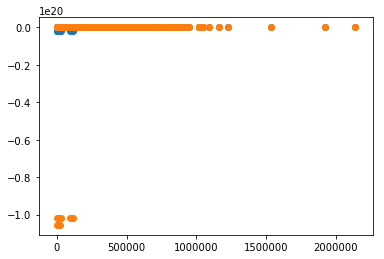

In [39]:
#######REGRESSION AND PREDICTION: Page-wise performance:
###ALT
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
import math

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

############ LOG SCALING - 
###PREDICTION TASK - with cross-promotion
###Cross-validation
train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
##drop dups
# train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')
all_pages = list(train.buzz_account_display_name.unique())

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
        ]

###convert to log-scale
# for feat in features:
#     train[feat] = np.log(train[feat]+1)

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

# lm = linear_model.LinearRegression(fit_intercept=True)
lm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
cv = 10

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

train['clicks_bucket'] = np.log(train['ext_twodays_consumptions_by_type__link_clicks'] + 1).astype(int)
train['share_bucket'] = np.log(train['ext_twodays_stories_by_action_type__share']+1).astype(int)

all_train = train

share_r2 = []
share_error = []
clicks_r2 = []
clicks_error = []
order_pages = []
len_samples = []

print("No. of data-points = ", len(train))

y_clicks = train['ext_twodays_consumptions_by_type__link_clicks']
y_share = train['ext_twodays_stories_by_action_type__share']
# y_clicks = train['clicks_bucket']
# y_share = train['share_bucket']

###generate DFs for analysis - X and Y
df = train[features]

# fit a model
model = lm

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y_share, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())

# Make cross validated predictions
predictions = cross_val_predict(model, df, y_share, cv=cv)

plt.scatter(y, predictions)

accuracy = metrics.r2_score(y_share, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)
share_r2.append(accuracy)

from sklearn.metrics import mean_absolute_error
# print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
error_percent = mean_absolute_error(y_share, predictions)/y_share.mean()
print("Mean values (share): ", y_share.mean(), " | percent error: ",  error_percent)
share_error.append(error_percent)

model = lm

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# # 10-fold CV
scores = cross_val_score(model, df, y_clicks, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y_clicks, cv=cv)

plt.scatter(y, predictions)

accuracy = metrics.r2_score(y_clicks, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)
clicks_r2.append(accuracy)

from sklearn.metrics import mean_absolute_error
# print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
error_percent = mean_absolute_error(y_clicks, predictions)/y_clicks.mean()
print("Mean values (clicks): ", y_clicks.mean(), " | percent error: ",  error_percent)
clicks_error.append(error_percent)
###get coefficients
#     import numpy as np
#     print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.cross_validation import train_test_split

X = df
y = y_share
X_train, X_test, y_train, y_test = train_test_split(X, y)

print("SHARE PREDICTIONS!")

svr_c = 0.01
svr_loss = "epsilon_insensitive"
# svr_loss = "squared_epsilon_insensitive"

lm = LinearRegression()
print('Fitting LR')
lm.fit(X_train, y_train)
pred_lm = lm.predict(X_test)
print("R2 accuracy for LM: ", metrics.r2_score(y_test, pred_lm))

print('Fitting SVR')
svr = LinearSVR(C = svr_c, loss=svr_loss)
svr.fit(X_train,y_train)
pred_svr = svr.predict(X_test)
print("R2 accuracy for SVR: ", metrics.r2_score(y_test, pred_svr))

# plt.plot(X,y, label='True data')
# plt.plot(X_test[::2], pred_SVR[::2], 'co', label='SVR')
# plt.plot(X_test[1::2], pred_lm[1::2], 'mo', label='Linear Reg')
# plt.legend(loc='upper left')

SHARE PREDICTIONS!
Fitting LR
R2 accuracy for LM:  0.789332200814
Fitting SVR
R2 accuracy for SVR:  0.157275409514


In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.cross_validation import train_test_split

X = df
y = y_clicks
X_train, X_test, y_train, y_test = train_test_split(X, y)

print("CLICKS PREDICTIONS!")

svr_c = 0.01
svr_loss = "epsilon_insensitive"
# svr_loss = "squared_epsilon_insensitive"

lm = LinearRegression()
print('Fitting LR')
lm.fit(X_train, y_train)
pred_lm = lm.predict(X_test)
print("R2 accuracy for LM: ", metrics.r2_score(y_test, pred_lm))

print('Fitting SVR')
svr = LinearSVR(C = svr_c, loss=svr_loss)
svr.fit(X_train,y_train)
pred_svr = svr.predict(X_test)
print("R2 accuracy for SVR: ", metrics.r2_score(y_test, pred_svr))

# plt.plot(X,y, label='True data')
# plt.plot(X_test[::2], pred_SVR[::2], 'co', label='SVR')
# plt.plot(X_test[1::2], pred_lm[1::2], 'mo', label='Linear Reg')
# plt.legend(loc='upper left')

CLICKS PREDICTIONS!
Fitting LR
R2 accuracy for LM:  0.88469481419
Fitting SVR
R2 accuracy for SVR:  0.678508033056


In [24]:
benchmark = {}
benchmark['Tasty'] = 692181     #90th percentile
page = 'Tasty'
train[(train[page] > 0) & (train[page] < train[page].max())]

,buzz_external_id,buzz_post_parent_external_id,buzz_post_created_at,buzz_account_display_name,buzz_post_type_name,buzz_post_buzz_id,buzz_campaign_uri,buzz_campaign_name,ext_table1_stats_date,ext_external_id,...,Tasty Junior,"Oh Great, More Politics",Einfach Tasty,BuzzFeed Steven L.,The Try Guys,Ohmygod Yaaa,BuzzFeed Chloe,Nifty Science,clicks_bucket,share_bucket
8,1431595910448704_1892206761054281,0.0,2017-05-29 22:39:48.276867,BuzzFeed Canada,link,4524151,do-you-notice-when-someone-steals-a-fry,Can Someone Steal A Fry From You Without You N...,2017-05-29 22:40:21 UTC,1431595910448704_1892206761054281,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,7,0
41,1726425217643704_1987117778241112,0.0,2017-05-29 21:00:07.897451,BuzzFeed Ladylike,link,4536909,make-some-pasta-and-well-reveal-your-greatest-...,Create A Bowl Of Pasta And We'll Tell You Your...,2017-05-29 21:05:05 UTC,1726425217643704_1987117778241112,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,9,1
44,1614251518827491_1926130917639548,0.0,2017-05-29 21:00:11.304048,Tasty,link,4524151,do-you-notice-when-someone-steals-a-fry,Can Someone Steal A Fry From You Without You N...,2017-05-29 21:05:04 UTC,1614251518827491_1926130917639548,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,12,6
78,1415259028748073_1888820181391953,0.0,2017-05-29 19:23:26.959735,Cheeky,link,4542251,he-tried,People Think This Boyfriend Is So Pure After H...,2017-05-29 19:25:07 UTC,1415259028748073_1888820181391953,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,7,2
122,1614251518827491_1926129877639652,0.0,2017-05-29 17:00:08.241496,Tasty,link,4537590,heres-what-a-muslim-dietitian-eats-during-ramadan,Here's What A Muslim Dietitian Eats During Ram...,2017-05-29 17:05:08 UTC,1614251518827491_1926129877639652,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,12,7
147,800616763324275_1550408938345050,0.0,2017-05-29 16:01:14.615758,BuzzFeed Health,link,4524151,do-you-notice-when-someone-steals-a-fry,Can Someone Steal A Fry From You Without You N...,2017-05-29 16:05:09 UTC,800616763324275_1550408938345050,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,8,2
250,574931839201643_1806230509405097,0.0,2017-05-29 09:02:12.151369,BuzzFeed UK,link,4534831,complain-about-your-ex-for-carbs,Complain About Your Ex And We'll Guess Your Fa...,2017-05-29 09:05:11 UTC,574931839201643_1806230509405097,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,9,2
336,1614251518827491_1925275531058420,0.0,2017-05-29 01:00:08.655502,Tasty,link,4539735,love-hate-roommates,19 Hilarious Tweets You Need To Send To Your R...,2017-05-29 01:05:13 UTC,1614251518827491_1925275531058420,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,12,5
400,1614251518827491_1925276444391662,0.0,2017-05-28 21:00:06.998197,Tasty,link,4539380,cheat-meals-personal-trainers-eat,12 Cheat Meals Personal Trainers Actually Eat,2017-05-28 21:05:07 UTC,1614251518827491_1925276444391662,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,12,5
475,1614251518827491_1924842904435016,0.0,2017-05-28 17:00:11.584436,Tasty,link,4540714,starbucks-order-will-reveal-what-you-should-wa...,Order A Bunch Of Stuff From Starbucks And We'l...,2017-05-28 17:05:09 UTC,1614251518827491_1924842904435016,...,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,11,4


In [ ]:
###

In [26]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.cross_validation import train_test_split

X = df
y = y_share
X_train, X_test, y_train, y_test = train_test_split(X, y)

print("SHARE PREDICTIONS!")

lm = LinearRegression(fit_intercept = True, normalize=True)
print('Fitting LR')
lm.fit(X_train, y_train)
pred_lm = lm.predict(X_test)
print("R2 accuracy for LM: ", metrics.r2_score(y_test, pred_lm))

# plt.plot(X,y, label='True data')
# plt.plot(X_test[::2], pred_SVR[::2], 'co', label='SVR')
# plt.plot(X_test[1::2], pred_lm[1::2], 'mo', label='Linear Reg')
# plt.legend(loc='upper left')

SHARE PREDICTIONS!
Fitting LR
R2 accuracy for LM:  0.82709789468


In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.cross_validation import train_test_split

X = df
y = y_clicks
X_train, X_test, y_train, y_test = train_test_split(X, y)

print("CLICKS PREDICTIONS!")

svr_c = 0.01
svr_loss = "epsilon_insensitive"
# svr_loss = "squared_epsilon_insensitive"

lm = LinearRegression()
print('Fitting LR')
lm.fit(X_train, y_train)
pred_lm = lm.predict(X_test)
print("R2 accuracy for LM: ", metrics.r2_score(y_test, pred_lm))

print('Fitting SVR')
svr = LinearSVR(C = svr_c, loss=svr_loss)
svr.fit(X_train,y_train)
pred_svr = svr.predict(X_test)
print("R2 accuracy for SVR: ", metrics.r2_score(y_test, pred_svr))

# plt.plot(X,y, label='True data')
# plt.plot(X_test[::2], pred_SVR[::2], 'co', label='SVR')
# plt.plot(X_test[1::2], pred_lm[1::2], 'mo', label='Linear Reg')
# plt.legend(loc='upper left')

CLICKS PREDICTIONS!
Fitting LR
R2 accuracy for LM:  0.864156731491
Fitting SVR
R2 accuracy for SVR:  -2.33872974441


WITH cross-promotion features
No. of data-points =  37231
Cross-Predicted Accuracy (R2): 0.700232621178
Mean values (share):  287.1133732642153  | percent error:  0.487775511734
Cross-Predicted Accuracy (R2): 0.864796005025
Mean values (clicks):  26589.06833015498  | percent error:  0.31550959731


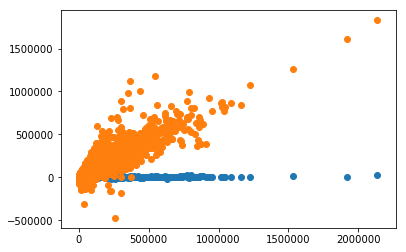

In [37]:
#######REGRESSION AND PREDICTION: Page-wise performance:
###ALT
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
import math

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

############ LOG SCALING - 
###PREDICTION TASK - with cross-promotion
###Cross-validation
train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
##drop dups
# train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')
all_pages = list(train.buzz_account_display_name.unique())
    
print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
        ]

###convert to log-scale
# for feat in features:
#     train[feat] = np.log(train[feat]+1)

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

lm = linear_model.LinearRegression(fit_intercept=True)
# lm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
cv = 10

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

train['clicks_bucket'] = np.log(train['ext_twodays_consumptions_by_type__link_clicks'] + 1).astype(int)
train['share_bucket'] = np.log(train['ext_twodays_stories_by_action_type__share']+1).astype(int)

all_train = train

share_r2 = []
share_error = []
clicks_r2 = []
clicks_error = []
order_pages = []
len_samples = []

print("No. of data-points = ", len(train))

y_clicks = train['ext_twodays_consumptions_by_type__link_clicks']
y_share = train['ext_twodays_stories_by_action_type__share']
# y_clicks = train['clicks_bucket']
# y_share = train['share_bucket']

###generate DFs for analysis - X and Y
df = train[features]

# fit a model
model = lm

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
# scores = cross_val_score(model, df, y_share, cv = 10)
# print("Cross-validated scores:", scores)
# print("Mean accuracy = ", scores.mean())

# Make cross validated predictions
predictions = cross_val_predict(model, df, y_share, cv=cv)

plt.scatter(y, predictions)

accuracy = metrics.r2_score(y_share, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)
share_r2.append(accuracy)

from sklearn.metrics import mean_absolute_error
# print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
error_percent = mean_absolute_error(y_share, predictions)/y_share.mean()
print("Mean values (share): ", y_share.mean(), " | percent error: ",  error_percent)
share_error.append(error_percent)

model = lm

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# # 10-fold CV
# scores = cross_val_score(model, df, y_clicks, cv = 10)
# print("Cross-validated scores:", scores)
# print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y_clicks, cv=cv)

plt.scatter(y, predictions)

accuracy = metrics.r2_score(y_clicks, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)
clicks_r2.append(accuracy)

from sklearn.metrics import mean_absolute_error
# print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
error_percent = mean_absolute_error(y_clicks, predictions)/y_clicks.mean()
print("Mean values (clicks): ", y_clicks.mean(), " | percent error: ",  error_percent)
clicks_error.append(error_percent)
###get coefficients
#     import numpy as np
#     print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

In [ ]:
#######REGRESSION AND PREDICTION: Page-wise performance:
###ALT
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline

###log buckets only
#####CLASSIFICATION
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
import math
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

############ LOG SCALING - 
###PREDICTION TASK - with cross-promotion
###Cross-validation
train = pd.read_csv('jan_may_2017_links_cross_posting_info.csv')
##drop dups
# train = train.sort_values('ext_table1_firsthour_stats_date', ascending = False).drop_duplicates(subset=['buzz_post_buzz_id', 'ext_external_id'], keep = 'last')

print("WITH cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
        ]

###convert to log-scale
# for feat in features:
#     train[feat] = np.log(train[feat]+1)

alt_inf = len(all_pages) + 1
train = train.replace(math.inf, alt_inf)

lm = linear_model.LinearRegression()
cv = 10

# ####add the category variable for each of the pages in col_pages
for pg in all_pages:
    features.append(pg)

train['clicks_bucket'] = np.log(train['ext_twodays_consumptions_by_type__link_clicks'] + 1).astype(int)
train['share_bucket'] = np.log(train['ext_twodays_stories_by_action_type__share']+1).astype(int)

all_train = train

share_accuracy = []
share_error = []
clicks_accuracy = []
clicks_error = []
order_pages = []
len_samples = []

for page in all_pages[:1]:
    
    train = all_train
    train = train[train['buzz_account_display_name'] == page]
    print("Working on page: ,", page, "; No. of data-points = ", len(train))
    if len(train) < cv:
        continue
    else:
        order_pages.append(page)
        len_samples.append(len(train))
#     y_clicks = train['ext_twodays_consumptions_by_type__link_clicks']
#     y_share = train['ext_twodays_stories_by_action_type__share']
    y_clicks = train['clicks_bucket']
    y_share = train['share_bucket']
    metric = 'share'
#     metric = 'clicks'

    if metric == 'share':
        y = y_share
        print("Testing for shares!")
    else:
        y = y_clicks
        print("Testing for clicks!")

    ###generate DFs for analysis - X and Y
    X = train[features]

    nb_alpha = 0.01
    # classifier = 'svm'
    classifier = 'nb'
    # classifier = 'logit'
    # classifier ='rf'
    logit_c = 1e5

    ####classifier
    # clf = LinearSVC(C=1)
    if classifier == 'nb':
        clf = MultinomialNB(alpha = nb_alpha)
    if classifier == 'logit':
        clf = linear_model.LogisticRegression(C=logit_c)
    #   Try penalty='l2' and 'l1'
    if classifier == 'rf':
        clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    else:
        clf = svm.SVC(kernel='linear')
        ###try different kernels

    # predicted = cross_val_predict(clf, X, y, cv=cv)
    # scores = metrics.accuracy_score(y, predicted)
    scores = cross_val_score(clf, X, y, cv = cv)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    # print("Accuracy: ", scores)
    scores = cross_val_score(clf, X, y, cv = cv)
    print(classifier, " - Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    share_r2.append(scores.mean())
    share_error.append(scores.std() * 2)
    
    # metric = 'share'
    metric = 'clicks'

    if metric == 'share':
        y = y_share
        print("Testing for shares!")
    else:
        y = y_clicks
        print("Testing for clicks!")

    ####classifier
    # clf = LinearSVC(C=1)
    if classifier == 'nb':
        clf = MultinomialNB(alpha = nb_alpha)
    if classifier == 'logit':
        clf = linear_model.LogisticRegression(C=logit_c)
    #   Try penalty='l2' and 'l1'
    if classifier == 'rf':
        clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    else:
        clf = svm.SVC(kernel='linear')
        ###try different kernels

    # predicted = cross_val_predict(clf, X, y, cv=cv)
    # scores = metrics.accuracy_score(y, predicted)
    scores = cross_val_score(clf, X, y, cv = cv)
    print(classifier, " - Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    clicks_r2.append(scores.mean())
    clicks_error.append(scores.std() * 2)

WITH cross-promotion features
Working on page: , BuzzFeed Quiz ; No. of data-points =  1909
Testing for shares!


/Users/eshwarchandrasekharan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


In [1]:
print(1)

1
